# Single Layer LSTM

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling imdb_reviews-train.tfrecord...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling imdb_reviews-test.tfrecord...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling imdb_reviews-unsupervised.tfrecord...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /home/yunshu/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
# You can use a smaller version of the datasets to speed things up
# For example, here we use the first 10% of the training data
# and the first 10% of the test data to speed things up
# When I used 10%, I was able to train on a CPU at about 65 seconds per epoch
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'].take(4000), dataset['test'].take(1000)

In [5]:
tokenizer = info.features['text'].encoder

In [6]:
# Can explore different buffer and batch sizes to make training
# faster also
BUFFER_SIZE = 1000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_dataset.padded_batch(BATCH_SIZE)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)), # Bidirectional 使得LSTM可以记忆两个方向上的上下文信息
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Can change number of epochs to make training faster
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
63/63 [==============================] - 40s 586ms/step - loss: 0.6932 - accuracy: 0.4908 - val_loss: 0.6675 - val_accuracy: 0.5720
Epoch 2/10
63/63 [==============================] - 36s 580ms/step - loss: 0.6019 - accuracy: 0.6965 - val_loss: 0.5792 - val_accuracy: 0.7060
Epoch 3/10
63/63 [==============================] - 36s 576ms/step - loss: 0.3150 - accuracy: 0.8734 - val_loss: 0.6628 - val_accuracy: 0.7170
Epoch 4/10
63/63 [==============================] - 37s 593ms/step - loss: 0.1204 - accuracy: 0.9602 - val_loss: 0.7715 - val_accuracy: 0.7000
Epoch 5/10
63/63 [==============================] - 37s 583ms/step - loss: 0.0551 - accuracy: 0.9859 - val_loss: 1.0046 - val_accuracy: 0.7050
Epoch 6/10
63/63 [==============================] - 37s 597ms/step - loss: 0.0203 - accuracy: 0.9973 - val_loss: 1.3509 - val_accuracy: 0.7060
Epoch 7/10
63/63 [==============================] - 37s 592ms/step - loss: 0.0068 - accuracy: 0.9978 - val_loss: 1.2464 - val_accuracy: 0.7120

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

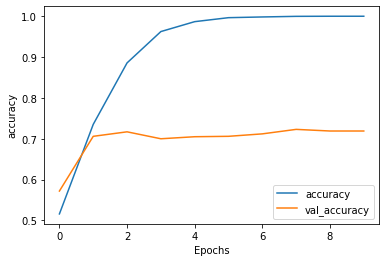

In [12]:
plot_graphs(history, 'accuracy')

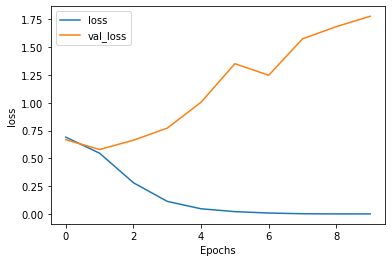

In [13]:
plot_graphs(history, 'loss')